# Keras Model for Beginners + EDA + R&D by SKS_2 

> https://hongdoki.github.io/2018/02/15/statoil-ccore-iceberg-classifier-challenge-summary.html 참고      
>
> 문제 정의 : 
   * 주어진 이미지가 빙하인지 선박인지 분류하는 이진 분류 
   * 평가 척도는 `log loss`를 사용 

# Import 

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from os.path import join as opj #파일과 디렉토리 경로 함수
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D #3차원 그래픽 그리는 함수
import pylab # 점차 없어질 함수 

plt.rcParams['figure.figsize'] = 10, 10 # width, height = 10
%matplotlib inline 

# Load Data 

In [2]:
train = pd.read_json('../data/train.json')
train.head()

,id,band_1,band_2,inc_angle,is_iceberg
0,dfd5f913,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",43.9239,0
1,e25388fd,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",38.1562,0
2,58b2aaa0,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",45.2859,1
3,4cfc3a18,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",43.8306,0
4,271f93f4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",35.6256,0


In [3]:
train.info()
print('\ntrain shape : {}'.format(train.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604 entries, 0 to 1603
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1604 non-null   object
 1   band_1      1604 non-null   object
 2   band_2      1604 non-null   object
 3   inc_angle   1604 non-null   object
 4   is_iceberg  1604 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 62.8+ KB

train shape : (1604, 5)


In [4]:
# 밴드 데이터 확인 
print('밴드 데이터 크기 :',len(train.loc[0,'band_1']))
print(train.loc[0,'band_1'])

밴드 데이터 크기 : 5625
[-27.878360999999998, -27.15416, -28.668615, -29.537971, -29.092485, -32.834259, -32.190609, -29.538139, -28.668869, -29.092695, -26.813871, -26.813911, -28.264969, -25.571039, -26.170347, -25.571125, -28.265137, -28.265181, -26.170513, -28.669331, -24.232399, -25.571377, -30.504866, -31.031487, -29.538857, -27.879414, -26.814545, -24.484478, -25.571672, -28.265686, -29.539068, -28.669796, -27.509998, -31.031866, -31.03191, -31.03195, -29.53932, -29.53936, -34.286621, -28.670132, -25.866602, -27.510378, -26.171484, -26.487411, -30.009279, -31.032372, -26.487539, -29.539783, -31.032497, -29.094337, -28.670595, -26.815557, -25.28783, -25.572683, -31.032751, -36.030342, -33.531609, -31.593452, -29.094717, -27.880804, -26.815933, -27.156643, -27.880932, -31.593704, -31.593744, -30.010164, -31.033257, -28.267242, -25.012739, -25.288548, -27.157022, -26.48859, -25.573483, -26.488674, -30.507013, -28.66853, -27.878401, -27.508776, -34.285191, -31.591261, -30.504148, -32.19060

In [5]:
train.loc[:,'band_1']

0       [-27.878360999999998, -27.15416, -28.668615, -...
1       [-12.242375, -14.920304999999999, -14.920363, ...
2       [-24.603676, -24.603714, -24.871029, -23.15277...
3       [-22.454607, -23.082819, -23.998013, -23.99805...
4       [-26.006956, -23.164886, -23.164886, -26.89116...
                              ...                        
1599    [-30.999878, -29.976866, -28.233906, -29.50732...
1600    [-25.31155, -26.511555, -28.694487, -27.180115...
1601    [-18.141895, -18.141844, -19.01737, -19.701599...
1602    [-22.455633, -25.794661, -26.954567, -22.83354...
1603    [-19.909191, -20.678406, -20.208834, -18.42441...
Name: band_1, Length: 1604, dtype: object

In [6]:
for i in train.index :
    print(len(train.loc[i,'band_1']))

5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625
5625


In [7]:
test =pd.read_json('../data/test.json')
test.head()

,id,band_1,band_2,inc_angle
0,5941774d,"[-15.863251, -15.201077, -17.887735, -19.17248...","[-21.629612, -21.142353, -23.908337, -28.34524...",34.966400
1,4023181e,"[-26.058969497680664, -26.058969497680664, -26...","[-25.754207611083984, -25.754207611083984, -25...",32.615072
2,b20200e4,"[-14.14109992980957, -15.064241409301758, -17....","[-14.74563980102539, -14.590410232543945, -14....",37.505433
3,e7f018bb,"[-12.167478, -13.706167, -16.54837, -13.572674...","[-24.32222, -26.375538, -24.096739, -23.8769, ...",34.473900
4,4371c8c3,"[-23.37459373474121, -26.02718162536621, -28.1...","[-25.72234344482422, -27.011577606201172, -23....",43.918874


In [8]:
test.shape 

(8424, 4)

In [9]:
len(test.loc[0,'band_1'])

5625

# About the Data 

Sentinel-1 SAT는 지구 위 약 680km 상공에 떠있다. 이 위성은 입사각에서 신호 펄스를 쏜 다음 다시 돌아올 때의 신호를 기록한다. 기본적으로 그러한 반사신호를 **후방 산란(Backscatter)계수** 라고 한다. 우리가 받은 데이터는 다음과 같이 주어진 전통적인 형태의 밴스캐터 계수다.    

* ip : 특정 픽셀의 입사각 
* ic : 이미지 중심에 대한 입사각 
* K : 상수 

우리는 Unknwon character Unknown character 0 를 데이터에서 찾을 수 있다.    

## Now Coming to the Feature of σo 
기본적으로  Unknwon character Unknown character0 는 신호가 산란되는 표면에 따라 달라진다. 예를 들어, 특정 입시각의 경우 다음과 같이 변화한다.    

* WATER....SETTLEMENTS......AGRICUTURE...BARREN....
* `HH` (trainmit/receive horizontally) : -27......2.7......-12......-17....
* `HV` (transmit horizontally and receive vertically) : -28....-20....-21.....-20.....
`HH`의 값은 다양하지만 `HV`는 그렇지 않은 것을 볼 수 있다. 이렇게 **2 채널**로 이루워져 있고 **소수점을 가지는 값** 으로 주어진다.  

**이미지 예시**   
* 사람이 맨눈으로 봤을 때 비교적 잘 되는 예시   
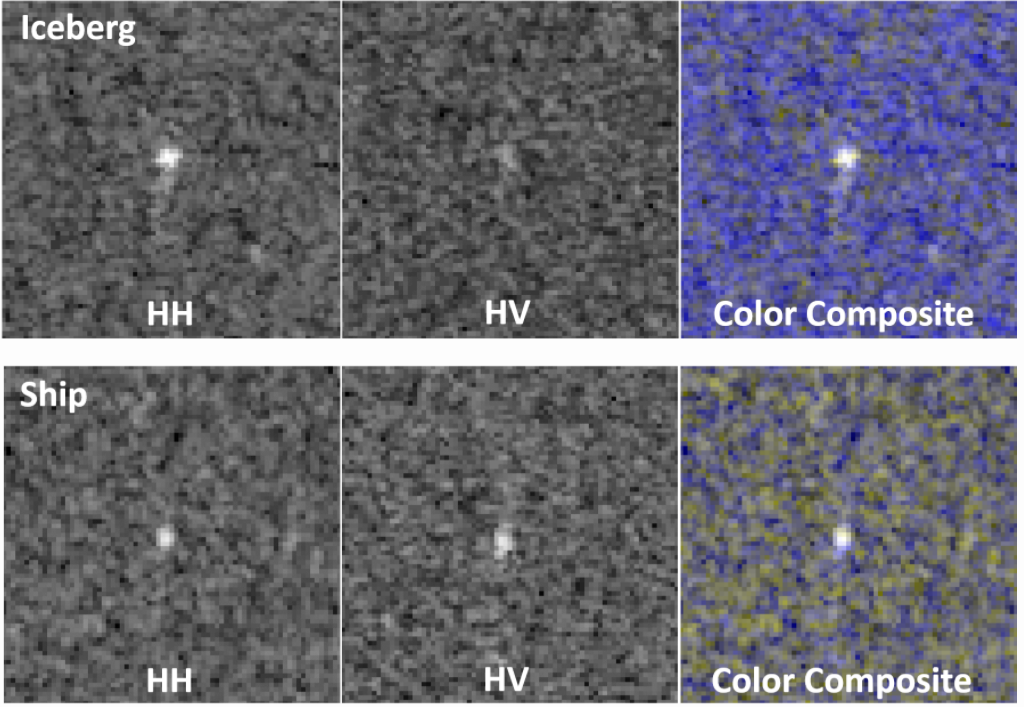
* 사람이 맨눈으로 봤을 때 구분이 비교적 잘 안되는 예시    
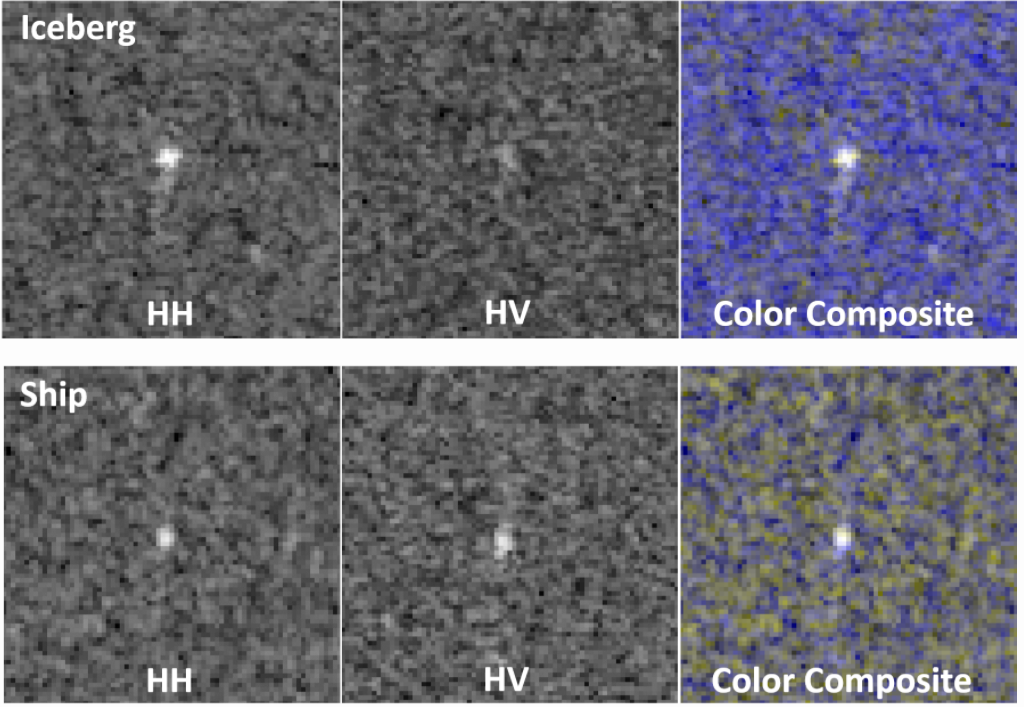



## WTF is HH HV ? 
이 Sentinel 인공위성은 RISTSAT(인도 윈격 감지 위성)에 해당하고 H 분극(polarization)에서 핑(ping)만 전송하고, V분극에서는 전송하지 않는다. 그 H-ping들은 흩어지고, 물체는 그들의 분극을 변화시키고 H와 V의 혼합으로 되돌아온다. Sentinel은 H-변환기만 가지고 있기 때문에, 회신 신호는 HH와 HV의 형태 뿐이다. Sentinel에는 V-ping 송신기가 없기 때문에 VV는 회신되지 않는다.     

다시 돌아와 피처에 대해 설명하자면, 이 데모 코드의 목적을 달성하기 위해 두 밴드를 모두 추출하여 그 밴드의 평균을 세 번째 채널로 하여 RGB 3 채널처럼 만들 수 있다. 

본 대회에서는 이미지에 해당하는 데이터와 더불어 **입사각(incidence angle)** 라는 수치가 주어지고, 입사각이 똑같은 데이터는 대부분 같은 범주에 속한다.*(블로그 글 참고)*       


In [10]:
## HH, HV, 평균으로 3개의 밴드 생성 
X_band_1  = np.array([np.array(band).astype(np.float32).reshape(75,75) for band in train['band_1']])
X_band_2 = np.array([np.array(band).astype(np.float32).reshape(75,75) for band in train['band_2']])

In [11]:
print('X_band_1 차원 : {}\nX_band_2 차원 : {}'.format(X_band_1.shape,X_band_2.shape))

X_band_1 차원 : (1604, 75, 75)
X_band_2 차원 : (1604, 75, 75)


In [12]:
#학습 데이터 생성 
# Q. 어떻게 붙였을까? 위 아래 ? 옆? 
X_train = np.concatenate([X_band_1[:,:,:,np.newaxis],X_band_2[:,:,:,np.newaxis],
                        ((X_band_1+X_band_2)/2)[:,:,:,np.newaxis]],axis = -1)

### Numpy.newaxis 함수는 뭘까? 
**간단히 말하면 넘파이 array 차원 늘려주는 함수**
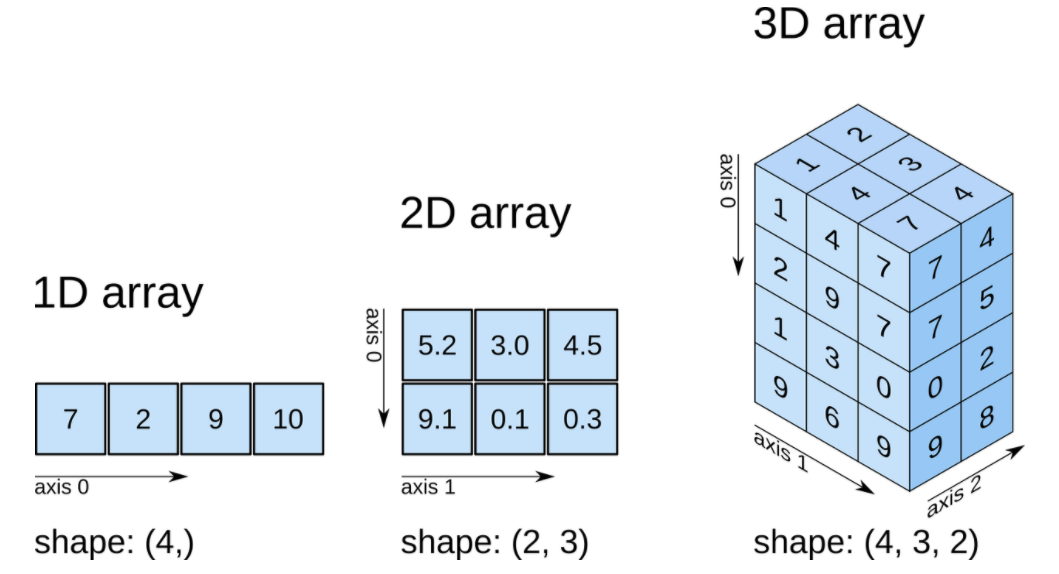

In [13]:
ex_1 = np.array([1,2,3,4,5])
ex_2 = np.array([6,7,8]) 

In [14]:
ex_1 + ex_2 

ValueError: operands could not be broadcast together with shapes (5,) (3,) 

In [15]:
ex_1_new = ex_1[:,np.newaxis]
ex_1_new

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [16]:
ex_1_new + ex_2 

array([[ 7,  8,  9],
       [ 8,  9, 10],
       [ 9, 10, 11],
       [10, 11, 12],
       [11, 12, 13]])

In [17]:
print('X_train 차원 :',X_train.shape)
X_train

X_train 차원 : (1604, 75, 75, 3)


array([[[[-27.87836 , -27.154118, -27.51624 ],
         [-27.15416 , -29.537888, -28.346024],
         [-28.668615, -31.0306  , -29.849607],
         ...,
         [-25.573483, -29.095308, -27.334396],
         [-26.488674, -29.540878, -28.014776],
         [-30.507013, -27.511766, -29.00939 ]],

        [[-28.66853 , -31.030518, -29.849524],
         [-27.8784  , -33.529335, -30.703869],
         [-27.508776, -31.591175, -29.549976],
         ...,
         [-26.488632, -34.288055, -30.388344],
         [-28.671562, -28.267496, -28.469528],
         [-31.594166, -26.488716, -29.041441]],

        [[-28.66853 , -33.52929 , -31.09891 ],
         [-27.15416 , -37.05116 , -32.10266 ],
         [-25.865042, -31.591175, -28.728107],
         ...,
         [-27.157106, -31.594084, -29.375595],
         [-27.881393, -32.19339 , -30.037392],
         [-32.837124, -29.54092 , -31.189022]],

        ...,

        [[-29.092905, -27.87895 , -28.485928],
         [-28.669163, -27.878992, -28.274078]

In [18]:
# 빙하를 3D 이미지로 생성
import plotly.offline as py 
import plotly.graph_objs as go 
py.init_notebook_mode(connected= True)

In [19]:
def plotmy3d(c, name) :
    data = [go.Surface(z = c)]
    layout = go.Layout(
        title= name,
        autosize=False, 
        width= 700,
        height=700,
        margin= dict(
            l = 65,
            r = 50,
            b = 65,
            t = 90
        )
    )
    
    fig = go.Figure(data = data, layout = layout)
    py.iplot(fig)
    
plotmy3d(X_band_1[12,:,:],'iceberg')

꽤 멋있는 빙상이 나왔다. 레이더 데이터에서 볼 때 빙산의 모양은 위와 같이 산과 비슷하게 생겼다는 걸 기억하라. 하지만 이것은 실제 이미지가 아니기 때문에 레이더의 산란으로 인해 봉우리(peak)가 있고 왜곡이 될 것이다. 배의 모양은 점처럼 될 것이고, 길쭉한 점처럼 될 수 있다. 여기서부터 빙산과 배의 구조적인 차이가 발생하고, CNN을 이용하여 이러한 차이를 이용할 수 있다. 레이더의 백스캐터를 이용해 합성 이미지를 만들 수 있다면 도움이 될 것이다. 

In [20]:
plotmy3d(X_band_1[14,:,:,],'ship')

이게 배이다. 길쭉한 점이 솟아오른 것처럼 보인다. 우리는 배의 형상을 시각화할만한 이미지 해상도를 갖지 않는다.   

# Modeling 

In [21]:
# 케라스 임포트
from matplotlib import pyplot
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, Activation
from tensorflow.keras.layers import GlobalMaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras import initializers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

Using TensorFlow backend.


In [22]:
# 모델 정의 
def getModel() :
    # 모델 설계 
    gmodel = Sequential()
    
    #Conv Layer 1
    gmodel.add(Conv2D(64,kernel_size = (3,3),activation='relu',input_shape = (75,75,3)))
    gmodel.add(MaxPooling2D(pool_size = (3,3),strides = (2,2)))
    gmodel.add(Dropout(0.2))
    
    #Conv Layer 2
    gmodel.add(Conv2D(64,kernel_size = (3,3),activation='relu',input_shape = (75,75,3)))
    gmodel.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
    gmodel.add(Dropout(0.2))
    
    #Conv Layer 3
    gmodel.add(Conv2D(64,kernel_size = (3,3),activation='relu',input_shape = (75,75,3)))
    gmodel.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
    gmodel.add(Dropout(0.2))
    
    #Conv Layer 4
    gmodel.add(Conv2D(64,kernel_size = (3,3),activation='relu',input_shape = (75,75,3)))
    gmodel.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
    gmodel.add(Dropout(0.2))
    
    #Dense Layer를 통과시키기 위해 데이터를 1차원으로 변환
    gmodel.add(Flatten())
    
    #Dense Layer 1
    gmodel.add(Dense(512))
    gmodel.add(Activation('relu'))
    gmodel.add(Dropout(0.2))
    
    #Sigmoid Layer
    gmodel.add(Dense(1))
    gmodel.add(Activation('sigmoid'))
    
    # 최적화 알고리즘 설정
    myoptim = Adam(lr =0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay= 0.0)
    gmodel.compile(loss = 'binary_crossentropy',
                  optimizer=myoptim,
                  metrics=['accuracy'])
    gmodel.summary()
    
    return gmodel 

In [23]:
# 콜백 함수 정의
def get_callbacks(filepath, patience = 2) :
    # val_loss가 최소화되는 방향으로
    # 더이상 최소화되지 않는 경우 patience만큼 봐줌
    es = EarlyStopping('val_loss',patience=patience,mode='min')
    
    #최고 성능 모델 저장
    msave = ModelCheckpoint(filepath, save_best_only = True)
    
    return [es, msave]

In [24]:
file_path = "../data/model_weights_2.hdf5"
callbacks = get_callbacks(filepath= file_path, patience=5)

# Train the Model 

In [25]:
# 타겟 값 추출
target_train = train['is_iceberg']

#학습 및 검증 데이터로 분리
X_train_cv, X_valid, y_train_cv, y_valid = train_test_split(X_train,target_train,
                                                           random_state = 1, train_size = 0.75)

In [26]:
import os 

gmodel = getModel()

#모델 학습 
gmodel.fit(X_train_cv, y_train_cv,
          batch_size = 24, epochs = 50, verbose = 1,
          validation_data = (X_valid, y_valid),
          callbacks = callbacks)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 73, 73, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        3

# Prediction 

In [28]:
X_band_test_1 = np.array([np.array(band).astype(np.float32).reshape(75,75) for band in test['band_1']])
X_band_test_2 = np.array([np.array(band).astype(np.float32).reshape(75,75) for band in test['band_2']])

#테스트 데이터 생성
X_test = np.concatenate([X_band_test_1[:,:,:,np.newaxis],
                       X_band_test_2[:,:,:,np.newaxis],
                       ((X_band_test_1 + X_band_test_2)/2)[:,:,:,np.newaxis]],axis = -1)

predicted_test = gmodel.predict_proba(X_test)

Instructions for updating:
Please use `model.predict()` instead.


In [33]:
print('predicte_test shape :',predicted_test.shape)
predicted_test[:10]

predicte_test shape : (8424, 1)


array([[2.1292481e-01],
       [6.9918543e-01],
       [1.0000000e+00],
       [9.9933380e-01],
       [8.8987505e-01],
       [2.7589083e-02],
       [4.6404332e-02],
       [9.9861467e-01],
       [4.4633129e-08],
       [1.1030860e-12]], dtype=float32)

# Submission 

In [34]:
submission = pd.DataFrame()
submission['id'] = test['id']
submission['is_iceberg'] = predicted_test.reshape((predicted_test.shape[0]))

In [36]:
submission.head()

,id,is_iceberg
0,5941774d,0.212925
1,4023181e,0.699185
2,b20200e4,1.000000
3,e7f018bb,0.999334
4,4371c8c3,0.889875


# Conclusion
성능을 더 높이기 위해서 스페클 노이즈 필터링, 입사각 피처 정규화 등 다른 전처리를 시도를 해봤는데 별 효과가 없는 것 같다. (저자가 직접 다 시도해본 듯)

이 커널로는 10위 안에 들 수 없다. 그래서 여기 8000개의 이미지가 담긴 테스트 데이터가 있다. 예측 성능을 높이기 테스트 데이터의 일부를 슈도-라벨링(Pseudo Labeling)을 하여 더 많은 데이터를 가지고 학습을 할 수 있다. 이와 관련된 글로는 다음이 있다. http://deeplearning.net/wp-content/uploads/2013/03/pseudo_label_final.pdf